In [1]:
!pip install pytorch-tabnet

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 44.5/44.5 kB 364.3 kB/s eta 0:00:00


In [1]:
tabnet.__version__

NameError: name 'tabnet' is not defined

In [3]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
import joblib

import missingno as msno
np.random.seed(0)

In [3]:
data = pd.read_csv("C:/Users/KIIT/Desktop/fetal_project/KFUH_Data.csv")
data.head()

,MRN,baseline value,accelerations,uterine_contractions,early_decelerations,late_decelerations,Variable_deceleration,prolongued_decelerations,variability,fetal_Health
0,1114526,134.83,0.0,3.083,0.83,0.0,2.33,0.0,15.0,Suspicion
1,1180260,132.00,0.0,0.600,0.00,0.0,0.00,0.0,20.0,normal
2,1193171,119.83,3.0,0.000,0.00,0.0,0.00,0.0,23.0,Normal
3,1197444,141.00,0.0,1.000,0.00,0.0,0.84,0.0,4.0,Suspicion
4,1228376,146.16,0.0,0.000,0.00,0.0,0.16,0.0,20.0,Suspicion


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MRN                       205 non-null    object 
 1   baseline value            205 non-null    float64
 2   accelerations             205 non-null    float64
 3   uterine_contractions      205 non-null    float64
 4   early_decelerations       198 non-null    float64
 5   late_decelerations        181 non-null    float64
 6   Variable_deceleration     204 non-null    float64
 7   prolongued_decelerations  200 non-null    float64
 8   variability               205 non-null    float64
 9   fetal_Health              205 non-null    object 
dtypes: float64(8), object(2)
memory usage: 16.1+ KB


In [5]:
data.shape

(205, 10)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,205.0,137.756482,13.105419,105.833,130.000000,136.670000,145.000000,180.000000
accelerations,205.0,0.461383,0.999345,0.000,0.000000,0.000000,0.500000,5.000000
uterine_contractions,205.0,3.074996,2.181554,0.000,1.300000,2.833333,4.333333,12.000000
early_decelerations,198.0,0.056481,0.214578,0.000,0.000000,0.000000,0.000000,1.333333
late_decelerations,181.0,0.073667,0.459912,0.000,0.000000,0.000000,0.000000,4.000000
Variable_deceleration,204.0,2.118292,3.932300,0.000,0.264456,1.000000,2.115000,25.000000
prolongued_decelerations,200.0,0.367722,0.804492,0.000,0.000000,0.000000,0.330000,5.000000
variability,205.0,12.668137,8.185108,1.300,7.800000,11.660000,16.000000,68.166667


In [7]:
data.nunique()

MRN                         198
baseline value               98
accelerations                34
uterine_contractions         94
early_decelerations           9
late_decelerations            7
Variable_deceleration        86
prolongued_decelerations     21
variability                  95
fetal_Health                  9
dtype: int64

In [8]:
data.skew()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_288\1188251951.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


baseline value              0.463918
accelerations               2.553711
uterine_contractions        0.738890
early_decelerations         3.975097
late_decelerations          6.844323
Variable_deceleration       3.777701
prolongued_decelerations    3.140209
variability                 2.451273
dtype: float64

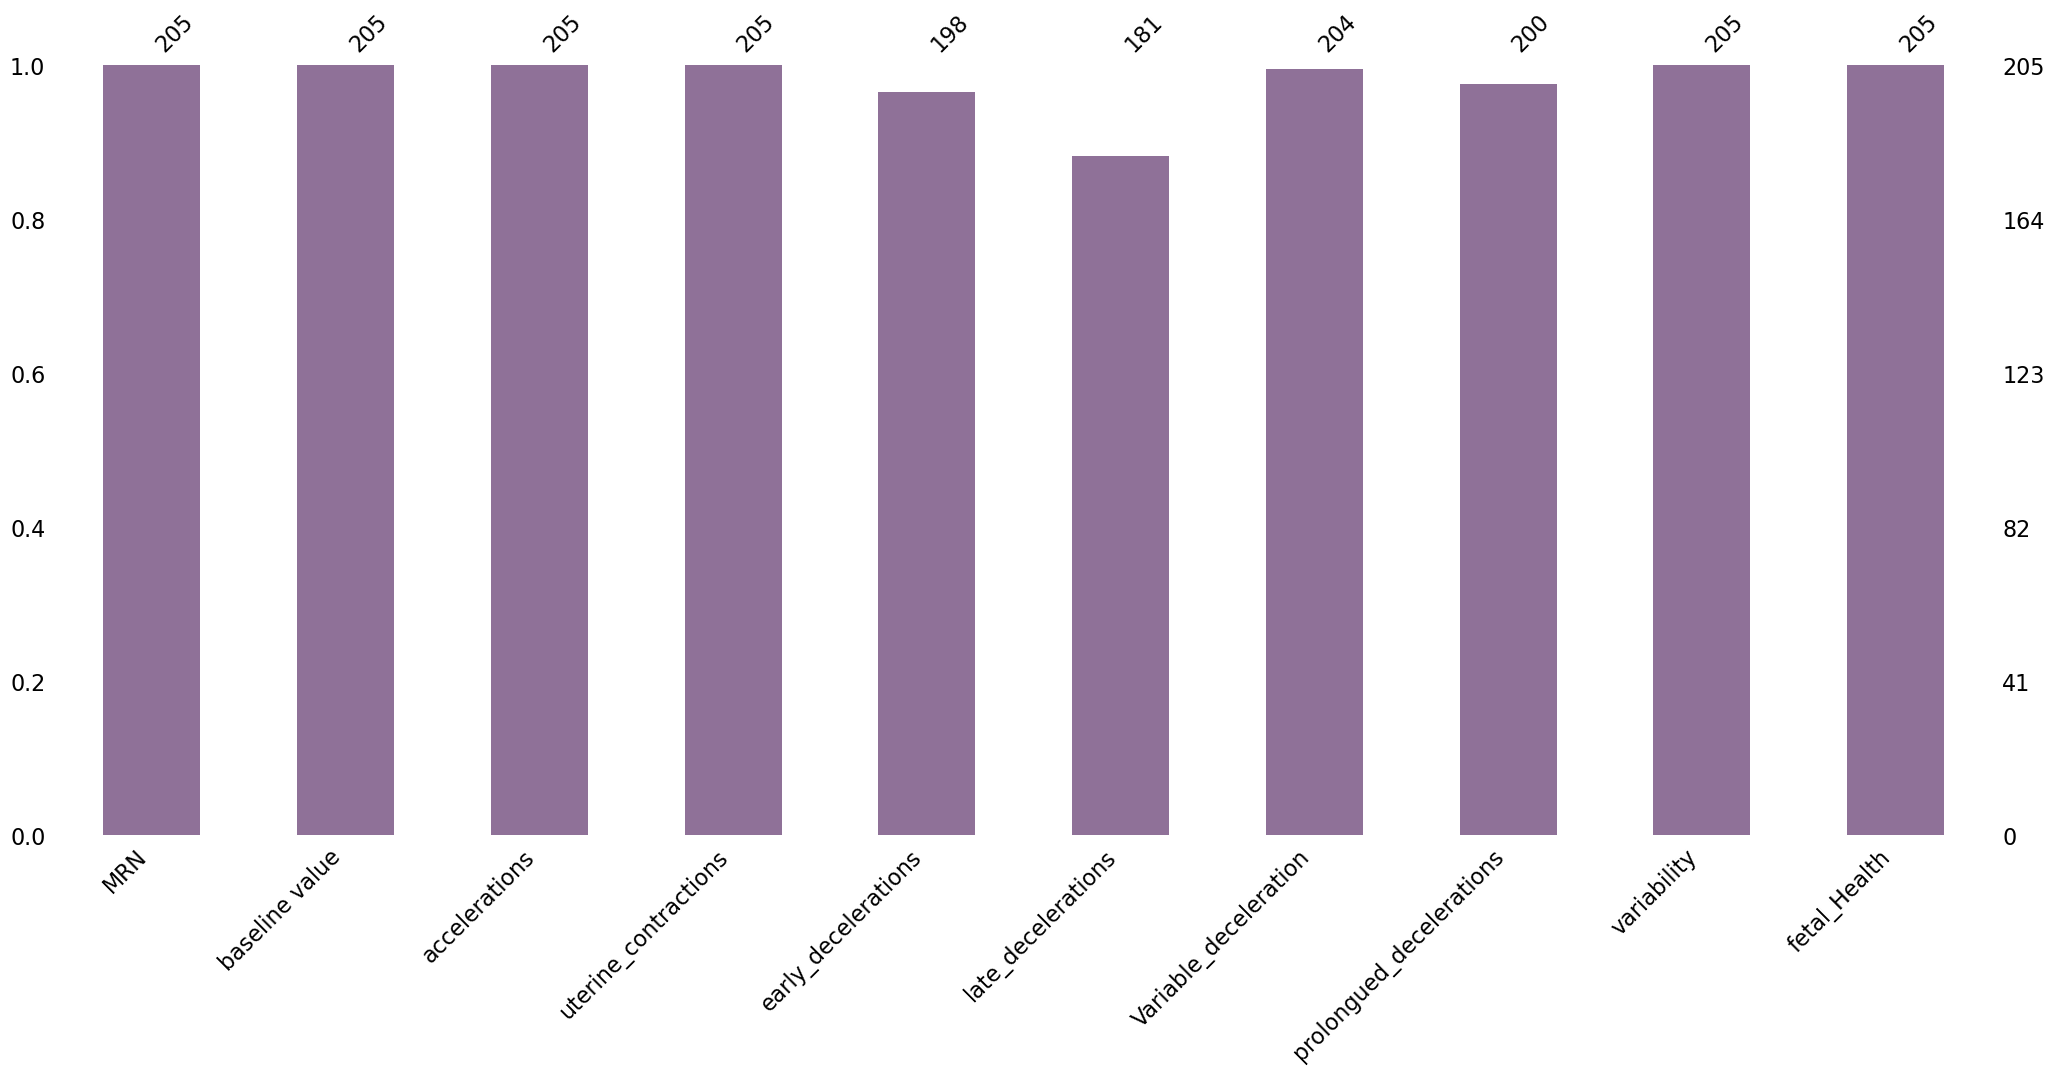

In [9]:
import missingno as msno
import matplotlib.pyplot as plt

null_plot = msno.bar(data, color="#8f7198")
plt.savefig("missing_data_graph.png")
#Bar Chart :This bar chart gives us an idea about how many missing values are there in each column.

In [10]:
# Calculate percentage of missing values in each column
null_percentage = data.isnull().sum() / len(data) * 100
print(null_percentage)

MRN                          0.000000
baseline value               0.000000
accelerations                0.000000
uterine_contractions         0.000000
early_decelerations          3.414634
late_decelerations          11.707317
Variable_deceleration        0.487805
prolongued_decelerations     2.439024
variability                  0.000000
fetal_Health                 0.000000
dtype: float64


In [11]:
duplicateds = data.copy()
duplicateds.drop_duplicates(inplace= True)
print("sum of duplicated = ", data.duplicated().sum())
print("is the data not duplicated")
data = duplicateds.copy()
print("sum of duplicated = " , data.duplicated().sum())
data.duplicated().sum()

sum of duplicated =  0
is the data not duplicated
sum of duplicated =  0


0

<Axes: >

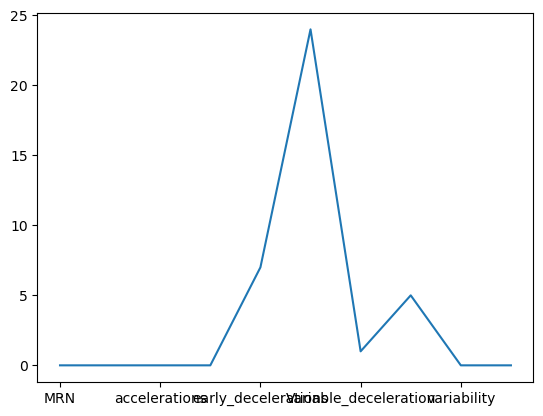

In [12]:
data.isnull().sum().plot()

In [13]:
data['fetal_Health'].unique()

array(['Suspicion', 'normal', 'Normal', 'pathologic', 'suspicion',
       'suspicion ', 'normal ', 'Normal ', 'pathologic '], dtype=object)

In [14]:
data['fetal_Health'] = data['fetal_Health'].str.strip().str.capitalize()

In [15]:
category_mapping = {
    'Suspicion': 2,
    'Normal': 1,
    'Pathologic': 3
}

# Apply the mapping to the DataFrame
data['fetal_Health'] = data['fetal_Health'].map(category_mapping)

# Verify the transformation
print(data['fetal_Health'].unique())

[2 1 3]


In [16]:
data.shape

(205, 10)

In [17]:
data

,MRN,baseline value,accelerations,uterine_contractions,early_decelerations,late_decelerations,Variable_deceleration,prolongued_decelerations,variability,fetal_Health
0,1114526,134.830000,0.000000,3.083000,0.83,0.0,2.330000,0.0,15.000000,2
1,1180260,132.000000,0.000000,0.600000,0.00,0.0,0.000000,0.0,20.000000,1
2,1193171,119.830000,3.000000,0.000000,0.00,0.0,0.000000,0.0,23.000000,1
3,1197444,141.000000,0.000000,1.000000,0.00,0.0,0.840000,0.0,4.000000,2
4,1228376,146.160000,0.000000,0.000000,0.00,0.0,0.160000,0.0,20.000000,2
...,...,...,...,...,...,...,...,...,...,...
200,894301,132.448110,0.000000,1.281095,0.00,0.0,0.328828,4.0,3.000000,3
201,978863,132.356128,0.589681,1.314611,0.00,0.0,0.000000,0.0,10.916595,1
202,1109953,132.165482,0.000000,1.328157,0.00,0.0,0.335349,0.0,10.840194,2
203,1259028,132.068063,0.563840,1.323590,0.00,0.0,0.000000,0.0,10.872587,1


C:\Users\KIIT\AppData\Local\Temp\ipykernel_288\280548294.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat= data.corr()


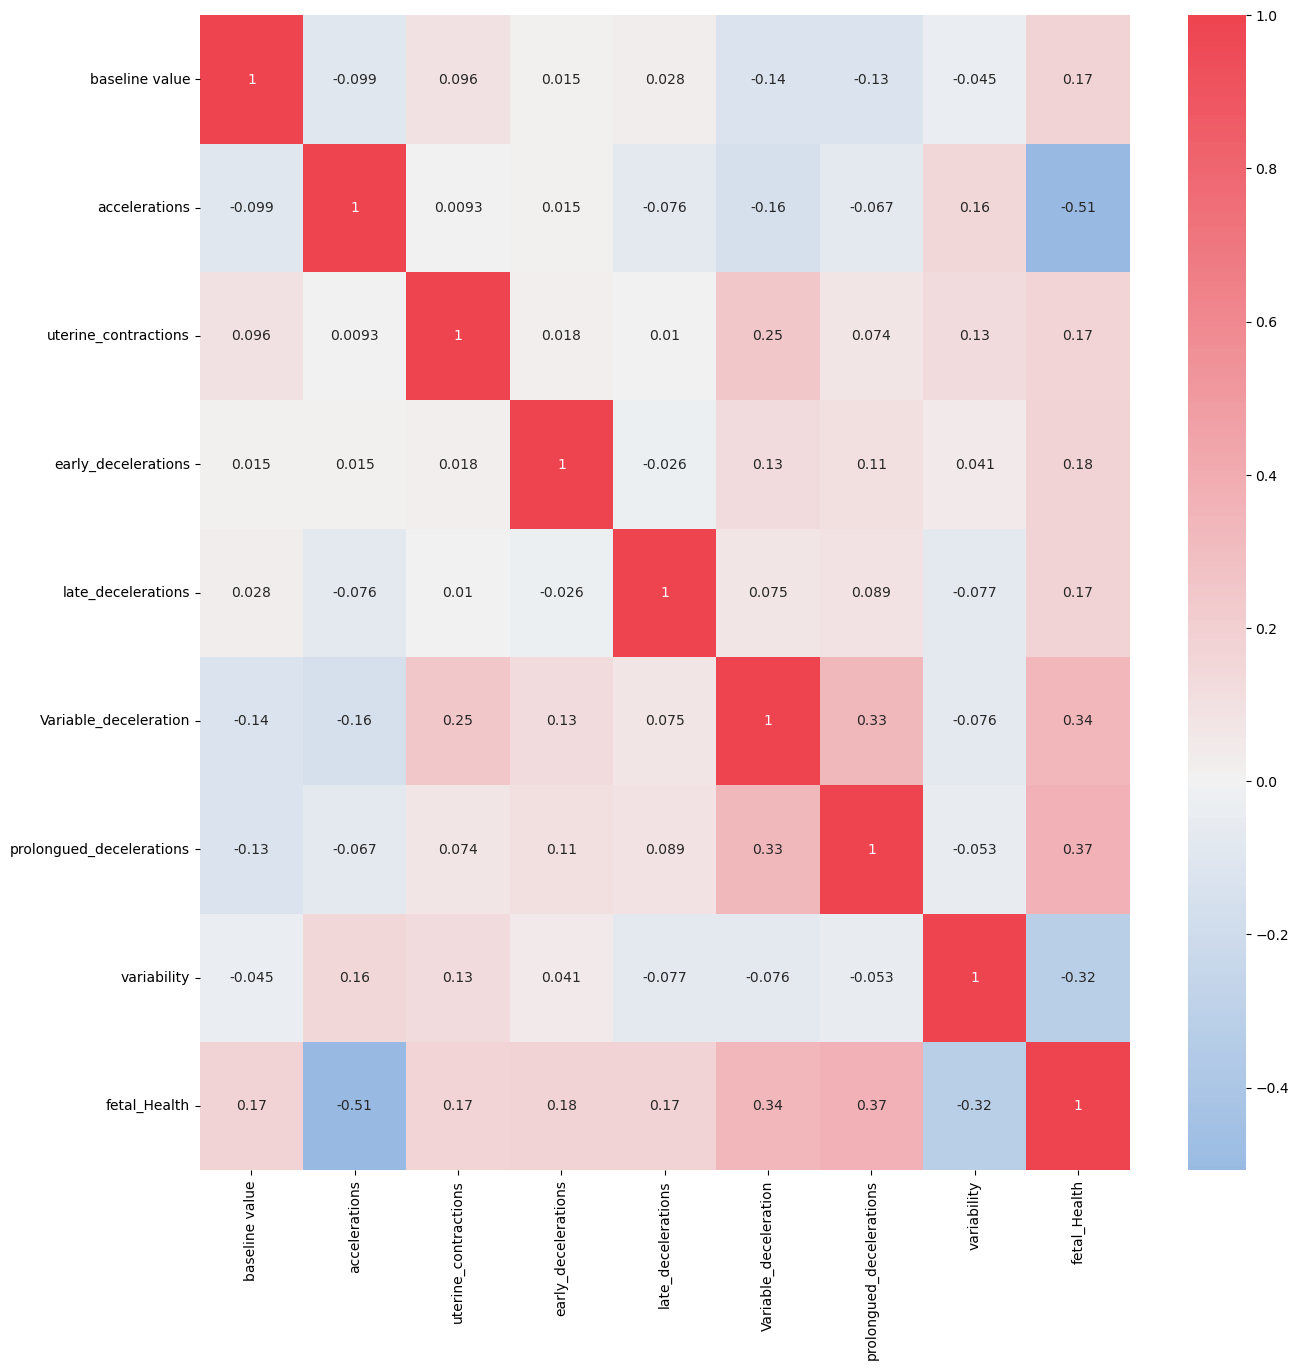

In [18]:
corrmat= data.corr()
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)
plt.savefig('correlation_matrix_heatmap.png')

<Axes: xlabel='accelerations', ylabel='variability'>

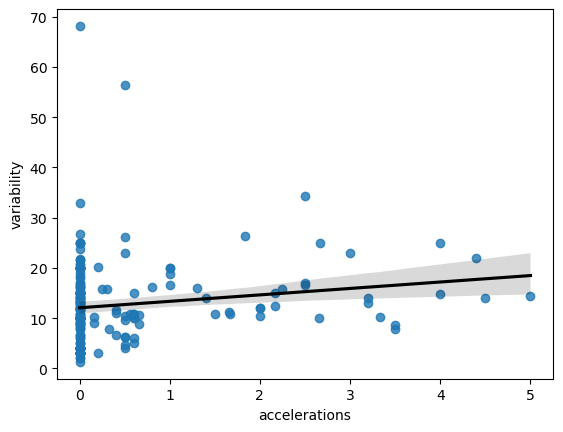

In [19]:
sns.regplot(x=data['accelerations'], y=data['variability'], line_kws={"color":'black'})

<Axes: xlabel='accelerations', ylabel='baseline value'>

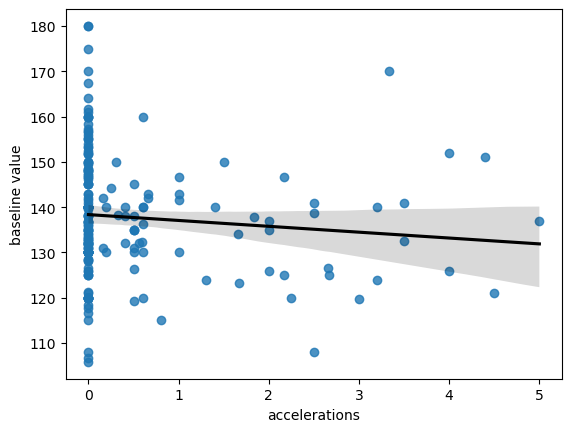

In [20]:
sns.regplot(x=data['accelerations'], y=data['baseline value'], line_kws={"color":'black'})

TypeError: Horizontal orientation requires numeric `x` variable.

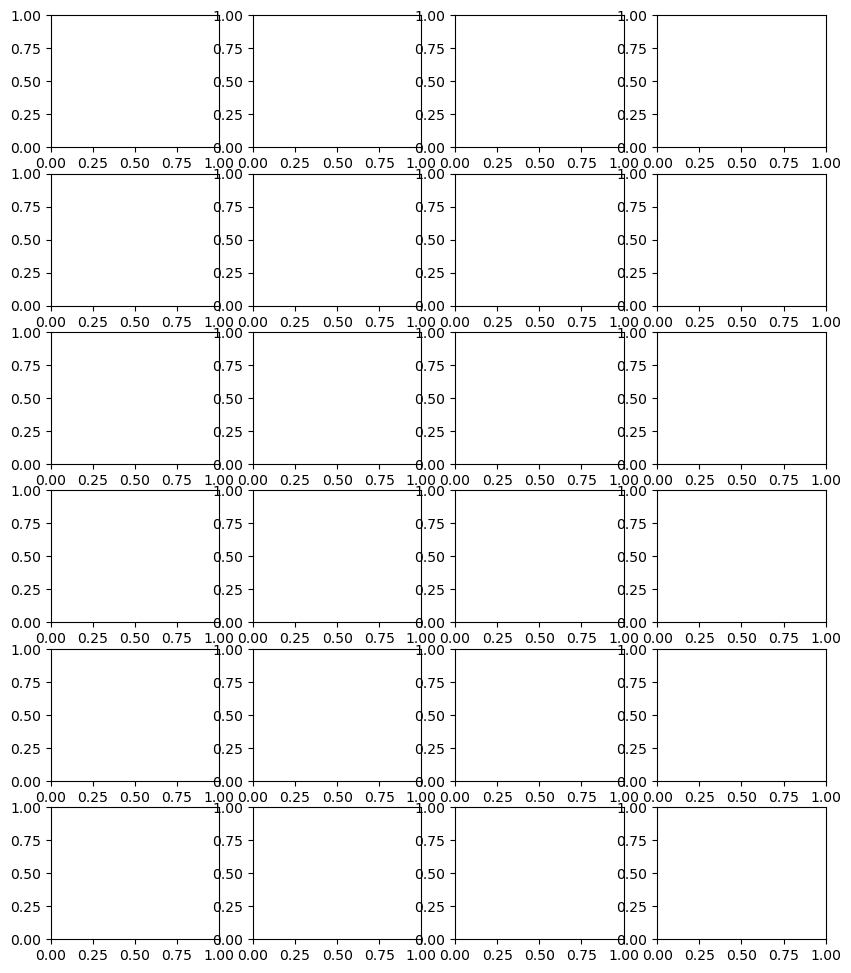

In [21]:
fig, axes = plt.subplots(6, 4, figsize=(10, 12))
axes = axes.flatten()
for i, column in enumerate(data.columns):
    sns.boxplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(f"{column}", fontsize=10)
    axes[i].set_xlabel("")
for i in range(len(data.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [22]:
#assigning values to features as X and target as y
X=data.drop(["fetal_Health"],axis=1)
y=data["fetal_Health"]

In [23]:
X

,MRN,baseline value,accelerations,uterine_contractions,early_decelerations,late_decelerations,Variable_deceleration,prolongued_decelerations,variability
0,1114526,134.830000,0.000000,3.083000,0.83,0.0,2.330000,0.0,15.000000
1,1180260,132.000000,0.000000,0.600000,0.00,0.0,0.000000,0.0,20.000000
2,1193171,119.830000,3.000000,0.000000,0.00,0.0,0.000000,0.0,23.000000
3,1197444,141.000000,0.000000,1.000000,0.00,0.0,0.840000,0.0,4.000000
4,1228376,146.160000,0.000000,0.000000,0.00,0.0,0.160000,0.0,20.000000
...,...,...,...,...,...,...,...,...,...
200,894301,132.448110,0.000000,1.281095,0.00,0.0,0.328828,4.0,3.000000
201,978863,132.356128,0.589681,1.314611,0.00,0.0,0.000000,0.0,10.916595
202,1109953,132.165482,0.000000,1.328157,0.00,0.0,0.335349,0.0,10.840194
203,1259028,132.068063,0.563840,1.323590,0.00,0.0,0.000000,0.0,10.872587


In [24]:
X = X.drop(X.columns[0], axis=1)

In [25]:
X

,baseline value,accelerations,uterine_contractions,early_decelerations,late_decelerations,Variable_deceleration,prolongued_decelerations,variability
0,134.830000,0.000000,3.083000,0.83,0.0,2.330000,0.0,15.000000
1,132.000000,0.000000,0.600000,0.00,0.0,0.000000,0.0,20.000000
2,119.830000,3.000000,0.000000,0.00,0.0,0.000000,0.0,23.000000
3,141.000000,0.000000,1.000000,0.00,0.0,0.840000,0.0,4.000000
4,146.160000,0.000000,0.000000,0.00,0.0,0.160000,0.0,20.000000
...,...,...,...,...,...,...,...,...
200,132.448110,0.000000,1.281095,0.00,0.0,0.328828,4.0,3.000000
201,132.356128,0.589681,1.314611,0.00,0.0,0.000000,0.0,10.916595
202,132.165482,0.000000,1.328157,0.00,0.0,0.335349,0.0,10.840194
203,132.068063,0.563840,1.323590,0.00,0.0,0.000000,0.0,10.872587


In [26]:
y.shape

(205,)

In [27]:
X_train , X_test , y_train , y_test = train_test_split(X,y ,test_size=0.3 ,
                                                   random_state=42)

2    130
1     40
3     35
Name: fetal_Health, dtype: int64


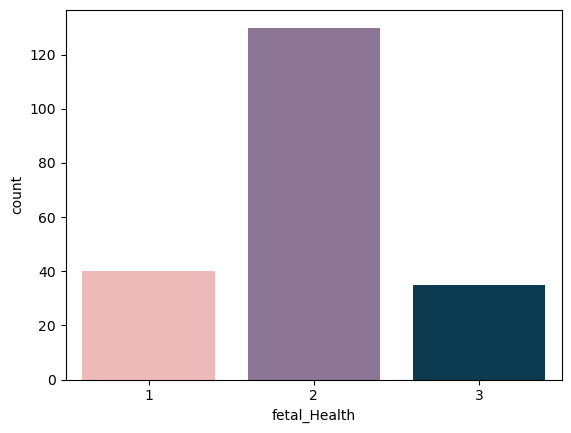

In [28]:
#first of all let us evaluate the target and find out if our data is imbalanced or not

colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= data, x="fetal_Health",palette=colours)
import pandas as pd

class_counts = data['fetal_Health'].value_counts()
print(class_counts)

In [29]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
# OverSampling
oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X_train, y_train)
#oversampled_df['fetal_health'] = data1[1]

In [30]:
X_over.shape

(270, 8)

In [31]:
y_over.shape

(270,)

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   baseline value            205 non-null    float64
 1   accelerations             205 non-null    float64
 2   uterine_contractions      205 non-null    float64
 3   early_decelerations       198 non-null    float64
 4   late_decelerations        181 non-null    float64
 5   Variable_deceleration     204 non-null    float64
 6   prolongued_decelerations  200 non-null    float64
 7   variability               205 non-null    float64
dtypes: float64(8)
memory usage: 14.4 KB


Index([], dtype='object')

In [33]:
# Scale X
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_over)
X_scaled=pd.DataFrame(X_scaled,columns=X_over.columns)
X_scaled.shape

(270, 8)

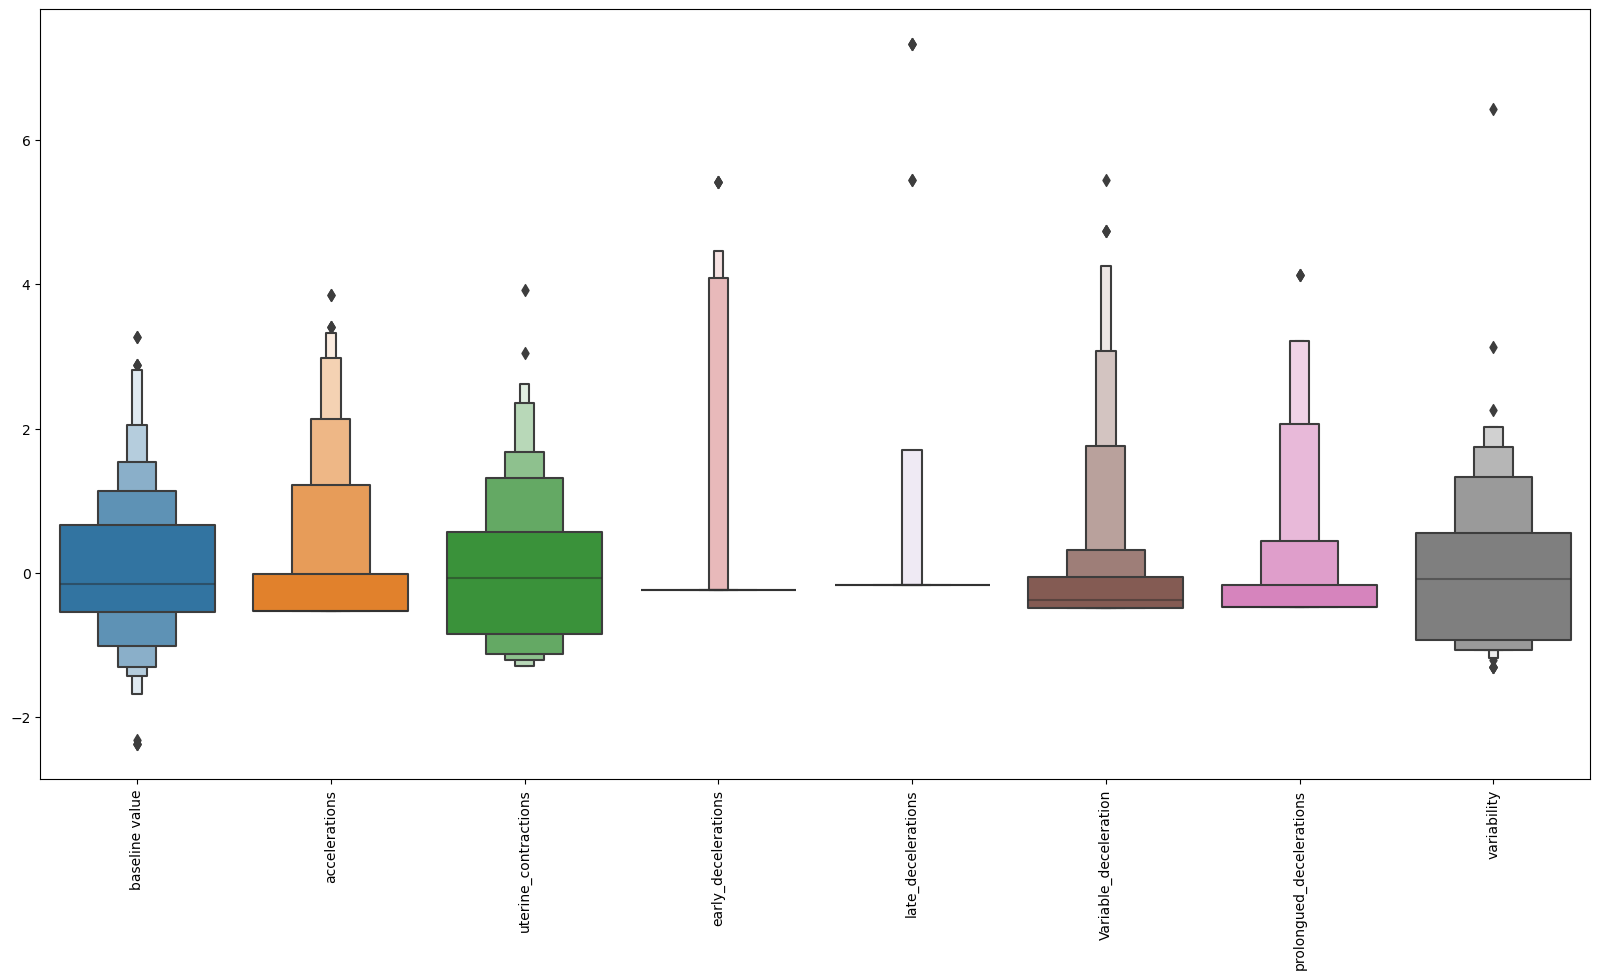

<Figure size 640x480 with 0 Axes>

In [34]:
#looking at the scaled features
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_scaled)
plt.xticks(rotation=90)
plt.show()
plt.savefig('Stander1.png')

In [35]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 15 to 104
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   baseline value            62 non-null     float64
 1   accelerations             62 non-null     float64
 2   uterine_contractions      62 non-null     float64
 3   early_decelerations       58 non-null     float64
 4   late_decelerations        56 non-null     float64
 5   Variable_deceleration     62 non-null     float64
 6   prolongued_decelerations  58 non-null     float64
 7   variability               62 non-null     float64
dtypes: float64(8)
memory usage: 4.4 KB


In [45]:
X_scaled.shape

(270, 8)

In [37]:
scaled_X_test = scaler.transform(X_test)
scaled_X_test = pd.DataFrame(scaled_X_test, columns=X_test.columns)

In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_scaled = imputer.fit_transform(X_scaled)


In [41]:
from sklearn.feature_selection import SelectKBest, f_classif


bestfeatures = SelectKBest(score_func=f_classif, k='all')

fit = bestfeatures.fit(X_scaled, y_over)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_scaled.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [40]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the data and transform it
X_scaled = imputer.fit_transform(X_scaled)


In [42]:
scaled_X_test = imputer.transform(scaled_X_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [43]:
##Result for testing dataset

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

# Random forest

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

# List of all the pipelines
pipelines = [pipeline_dt, pipeline_rf]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Decision Tree', 1: 'RandomForest'}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_scaled, y_over)

#cross validation on accuracy
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_scaled, y_over, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

# Initialize lists to store precision, recall, and F1-score
precision_scores = []
recall_scores = []
f1_scores = []

# Make predictions and calculate precision, recall, and F1-score for each model
for i, model in enumerate(pipelines):
    y_pred = model.predict(scaled_X_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Append the scores to respective lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Print the scores for each model
    print(f"{pipe_dict[i]} Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")


Decision Tree: 0.959259 
RandomForest: 0.940741 
Decision Tree Precision: 0.8041, Recall: 0.8503, F1-score: 0.8240
RandomForest Precision: 0.9467, Recall: 0.9290, F1-score: 0.9373


In [50]:
#Building a dictionalry with list of optional values that will me analyesed by GridSearch CV
import warnings


# Ignore FutureWarning related to max_features='auto'
warnings.filterwarnings("ignore", category=FutureWarning)
parameters = {
    'n_estimators': [100,150, 200,500,700,900],
    'max_features': ['auto','sqrt', 'log2'],
    'max_depth' : [4,6,8,12,14,16],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1,1,None]
}

#Fitting the trainingset to find parameters with best accuracy

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv= 5)
CV_rfc.fit(X_scaled, y_over)

#Getting the outcome of gridsearch

CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100,
 'n_jobs': None}

In [51]:
RF_model = RandomForestClassifier(**CV_rfc.best_params_)
RF_model.fit(X_scaled, y_over)
#Testing the Model on test set
predictions=RF_model.predict(scaled_X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

0.967741935483871

In [52]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Assuming y_test and predictions are defined

recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1 = f1_score(y_test, predictions, average="micro")

print("********* Random Forest Results after GridSearchCv *********")
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

********* Random Forest Results after GridSearchCv *********
Recall: 0.967741935483871
Precision: 0.9692780337941628
F1 Score: 0.967741935483871


In [53]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        13
           2       0.95      1.00      0.98        40
           3       1.00      0.89      0.94         9

    accuracy                           0.97        62
   macro avg       0.98      0.94      0.96        62
weighted avg       0.97      0.97      0.97        62



<Axes: >

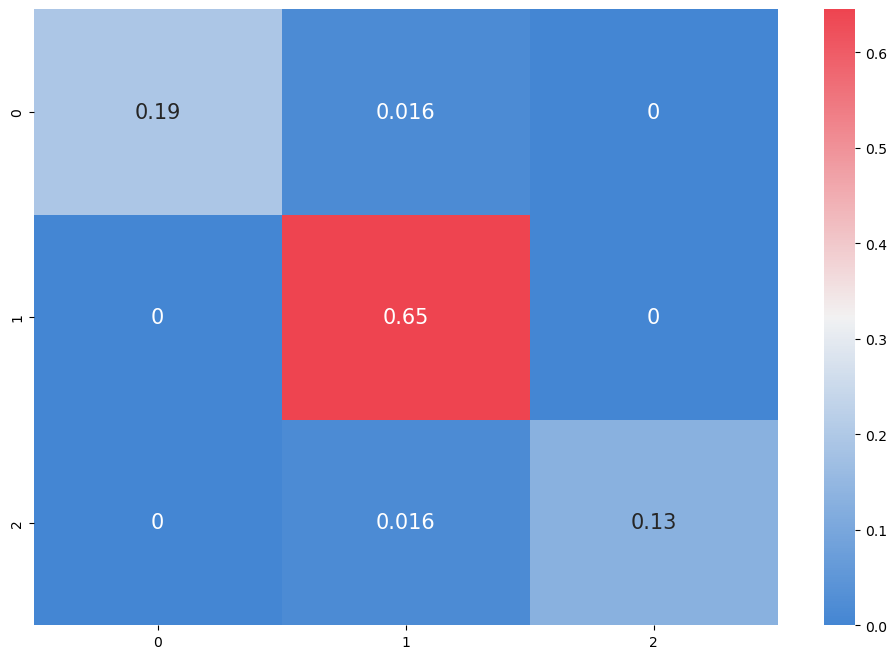

In [54]:
# cofusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
# Define and train SVC without grid search
svc = SVC(random_state=42)
svc.fit(X_scaled, y_over)

# Predictions
y_pred_svc = svc.predict(scaled_X_test)

# Metrics calculation
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc, average='macro')
recall_svc = recall_score(y_test, y_pred_svc, average='macro')
f1_svc = f1_score(y_test, y_pred_svc, average='macro')

# Print metrics
print("Without GridSearchCV:")
print(f"Accuracy: {accuracy_svc:.4f}")
print(f"Precision: {precision_svc:.4f}")
print(f"Recall: {recall_svc:.4f}")
print(f"F1-score: {f1_svc:.4f}")


Without GridSearchCV:
Accuracy: 0.7742
Precision: 0.7213
Recall: 0.8027
F1-score: 0.7502


In [56]:
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
              # ,'linear','sigmoid'

grid = GridSearchCV(SVC(random_state=42), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_scaled, y_over)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.630 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.870 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.815 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.630 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.722 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.815 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.759 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.796 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.815 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.741 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.889 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.889 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.907 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.907 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.889 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.870 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.926 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.907 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.926 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.889 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.870 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.907 total time=   0.0s
[CV 1/5] END ..C=1000, gamma

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predictions using the best estimator from grid search
y_pred_best = grid.best_estimator_.predict(scaled_X_test)

# Precision, Recall, and F1-score calculation
precision_best = precision_score(y_test, y_pred_best, average='macro')
recall_best = recall_score(y_test, y_pred_best, average='macro')
f1_best = f1_score(y_test, y_pred_best, average='macro')

# Print the best parameters, accuracy, precision, recall, and F1-score
print("Best parameters found by GridSearchCV:")
print(grid.best_params_)

accuracy_with_tuning = grid.best_score_ * 100
print("Accuracy for our training dataset with tuning is: {:.2f}%".format(accuracy_with_tuning))

print("Precision: {:.4f}".format(precision_best))
print("Recall: {:.4f}".format(recall_best))
print("F1-score: {:.4f}".format(f1_best))


Best parameters found by GridSearchCV:
{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Accuracy for our training dataset with tuning is: 94.44%
Precision: 0.5745
Recall: 0.5113
F1-score: 0.5312


In [59]:
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
#X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


NotFittedError: This SimpleImputer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [58]:
print(classification_report(y_test,grid.best_estimator_.predict(X_test)))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [60]:
print(classification_report(y_test,grid.best_estimator_.predict(scaled_X_test)))

              precision    recall  f1-score   support

           1       0.67      0.46      0.55        13
           2       0.72      0.85      0.78        40
           3       0.33      0.22      0.27         9

    accuracy                           0.68        62
   macro avg       0.57      0.51      0.53        62
weighted avg       0.65      0.68      0.66        62



In [61]:
!pip install --upgrade numpy

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 15.8/15.8 MB 6.8 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.26.4 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.4 which is incompatible.


In [62]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


In [64]:
X_train_np

array([[134.83      ,   0.        ,   3.083     , ...,   2.33      ,
          0.        ,  15.        ],
       [132.        ,   0.        ,   0.6       , ...,   0.        ,
          0.        ,  20.        ],
       [119.83      ,   3.        ,   0.        , ...,   0.        ,
          0.        ,  23.        ],
       ...,
       [132.1654825 ,   0.        ,   1.32815684, ...,   0.33534866,
          0.        ,  10.8401939 ],
       [132.0680629 ,   0.56384015,   1.32359039, ...,   0.        ,
          0.        ,  10.8725873 ],
       [132.1557956 ,   0.        ,   1.31755298, ...,   0.31891593,
          0.        ,  10.9091065 ]])

In [65]:
X_test_np

array([[1.50000000e+02, 3.00000000e-01, 4.50000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.00000000e-01, 0.00000000e+00, 1.58300000e+01],
       [1.56000000e+02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.10000000e-01, 0.00000000e+00, 1.32100000e+01],
       [1.30000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.80000000e+00, 5.00000000e-01, 1.20000000e+01],
       [1.40000000e+02, 0.00000000e+00, 2.80000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.00000000e-01, 0.00000000e+00, 1.52000000e+01],
       [1.25000000e+02, 0.00000000e+00, 4.66000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.00000000e-01, 0.00000000e+00, 9.00000000e+00],
       [1.37833333e+02, 1.83333333e+00, 1.16666667e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.63333333e+01],
       [1.25000000e+02, 2.16666667e+00, 2.83333333e+00, 1.33333333e+00,
                   nan, 3.00000000e+00, 1.00000000e+00, 1.

In [66]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
X_train_np = imputer.fit_transform(X_train_np)

# Transform the training data
X_test_np = imputer.transform(X_test_np)

In [69]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with the desired strategy
target_imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training target variable
y_train_n = target_imputer.fit_transform(y_train_np.reshape(-1, 1))

# Transform the training target variable
y_test_n = target_imputer.transform(y_test_np.reshape(-1, 1))


In [67]:
X_test_np


array([[1.50000000e+02, 3.00000000e-01, 4.50000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.00000000e-01, 0.00000000e+00, 1.58300000e+01],
       [1.56000000e+02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.10000000e-01, 0.00000000e+00, 1.32100000e+01],
       [1.30000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.80000000e+00, 5.00000000e-01, 1.20000000e+01],
       [1.40000000e+02, 0.00000000e+00, 2.80000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.00000000e-01, 0.00000000e+00, 1.52000000e+01],
       [1.25000000e+02, 0.00000000e+00, 4.66000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.00000000e-01, 0.00000000e+00, 9.00000000e+00],
       [1.37833333e+02, 1.83333333e+00, 1.16666667e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.63333333e+01],
       [1.25000000e+02, 2.16666667e+00, 2.83333333e+00, 1.33333333e+00,
        7.36666667e-02, 3.00000000e+00, 1.00000000e+00, 1.

In [70]:
# TabNet

# Convert data to numpy arrays
X_train_np = X.values
y_train_n = y.values
X_test_np = X_test.values
y_test_n = y_test.values

# Define and train TabNet model
tabnet_model = TabNetClassifier()
tabnet_model.fit(X_train_np, y_train_n, eval_set=[(X_train_np, y_train_n)], patience=10, max_epochs=100)


from sklearn.metrics import accuracy_score

# Predict on test set
y_pred = tabnet_model.predict(X_test_np)

# Evaluate accuracy
accuracy = accuracy_score(y_test_n, y_pred)
print("Accuracy:", accuracy)

C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


ValueError: Input contains NaN.

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


voting_classifier = VotingClassifier(
    estimators=[ ('dt', pipeline_dt), ('svc', svc), ('rf', RF_model)],
    voting='hard'  # Voting strategy: 'hard' for majority voting, 'soft' for weighted voting
)

# Train Voting Classifier
voting_classifier.fit(X_scaled, y_over)

# Make predictions
y_pred = voting_classifier.predict(scaled_X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F-score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", fscore)


Accuracy: 0.9032258064516129
Precision: 0.9079796264855687
Recall: 0.9032258064516129
F-score: 0.9042892591279689


In [72]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the base estimators separately
base_estimators = [
    ('rf', RF_model),
    ('dt', pipeline_dt),
    ('SVC', grid)
]

# Initialize AdaBoostClassifier with the base estimators
adaboost_model = AdaBoostClassifier(base_estimators)

# Fit the model
adaboost_model.fit(X_scaled, y_over)

# Predict on the test set
y_pred_adaboost = adaboost_model.predict(scaled_X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_adaboost)
precision = precision_score(y_test, y_pred_adaboost, average="weighted")
recall = recall_score(y_test, y_pred_adaboost, average="weighted")
f1 = f1_score(y_test, y_pred_adaboost, average="weighted")

# Print evaluation metrics
print("Evaluation Metrics for AdaBoost Model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


InvalidParameterError: The 'estimator' parameter of AdaBoostClassifier must be an object implementing 'fit' and 'predict' or None. Got [('rf', RandomForestClassifier(max_depth=8, max_features='auto')), ('dt', Pipeline(steps=[('dt_classifier', DecisionTreeClassifier(random_state=42))])), ('SVC', GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3))] instead.

In [75]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the base classifiers
base_classifiers = [
    ('rf',RF_model),
    ('dt', pipeline_dt),
    ('svc', svc),
    # Add more base classifiers as needed
]

# Initialize the BaggingClassifier with base classifiers
bagging_model = BaggingClassifier (
    base_estimator=None,
    n_estimators=10,  # Number of base classifiers in the ensemble
    random_state=42
)

bagging_model.fit(X_scaled, y_over)
y_pred_bagging = bagging_model.predict(scaled_X_test)

accuracy = accuracy_score(y_test, y_pred_bagging)
precision = precision_score(y_test, y_pred_bagging, average="weighted")
recall = recall_score(y_test, y_pred_bagging, average="weighted")
f1 = f1_score(y_test, y_pred_bagging, average="weighted")

print("Evaluation Metrics for Bagging Model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Evaluation Metrics for Bagging Model:
Accuracy: 0.8871
Precision: 0.9006
Recall: 0.8871
F1 Score: 0.8900


In [76]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
stacking_model = StackingClassifier(
    estimators=[
        ('rf', RF_model),
        ('dt', pipeline_dt),
        ('SVC', grid)## ADD SOME MODELS HERE From earlier models
    ],
    final_estimator=LogisticRegression()
)
stacking_model.fit(X_scaled, y_over)
y_pred_stacking = stacking_model.predict(scaled_X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Accuracy for Stacking Model:", accuracy_stacking)



from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, and F-score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred_stacking, average='weighted')

# Print precision, recall, and F-score
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", fscore)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.630 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.870 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.815 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.630 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.722 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.815 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.759 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.796 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.815 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.741 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.773 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.721 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.884 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.791 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.628 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.795 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.767 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.767 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.814 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.767 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.523 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.791 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.886 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.907 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.930 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.860 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.907 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.909 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.884 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.930 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.814 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.930 total time=   0.0s
[CV 1/5] END ..C=1000, gamma

[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.767 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.837 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.814 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.705 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.791 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.814 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.791 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.767 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.455 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.628 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.605 total time=   0.0s
[CV 4/5] END .....C=0.1, gam

[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.488 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.465 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.581 total time=   0.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.884 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.884 total time=   0.0s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.837 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.837 total time=   0.0s
[CV 5/5] END ........C=1, ga

[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.791 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.364 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.605 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.558 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.558 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.318 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.581 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.535 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.488 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.558 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.318 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma

[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.860 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.818 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.814 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.860 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.860 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.837 total time=   0.0s
Accuracy for Stacking Model: 0.8548387096774194
Precision: 0.8720401509951956
Recall: 0.8548387096774194
F-score: 0.8447392527645096


In [77]:
joblib.dump(RF_model, 'saved_models/RF_model.pkl')
joblib.dump(pipeline_dt, 'saved_models/dt_classifier.pkl')
joblib.dump(stacking_model, 'saved_models/stacking_model.pkl')
joblib.dump(voting_classifier, 'saved_models/voting_model.pkl')
joblib.dump(bagging_model, 'saved_models/bagging_model.pkl')
joblib.dump(grid.best_estimator_, 'saved_models/svm_model.pkl')


['saved_models/svm_model.pkl']

In [7]:
import missingno
import numpy
import pandas
import pytorch_tabnet
import sklearn
import scipy
import seaborn

print("missingno version:", missingno.__version__)
print("numpy version:", numpy.__version__)
print("pandas version:", pandas.__version__)
#print("pytorch-tabnet version:", pytorch_tabnet.__version__)
print("scikit-learn version:", sklearn.__version__)
print("scipy version:", scipy.__version__)
print("seaborn version:", seaborn.__version__)


missingno version: 0.5.2
numpy version: 1.26.4
pandas version: 1.5.3
scikit-learn version: 1.2.1
scipy version: 1.10.0
seaborn version: 0.12.2


In [8]:
pip show pytorch-tabnet


Name: pytorch-tabnet
Version: 4.1.0
Summary: PyTorch implementation of TabNet
Home-page: https://github.com/dreamquark-ai/tabnet
Author: 
Author-email: 
License: 
Location: c:\users\kiit\appdata\roaming\python\python310\site-packages
Requires: numpy, scikit_learn, scipy, torch, tqdm
Required-by: 
Note: you may need to restart the kernel to use updated packages.
